In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset_path = "Online_Retail.csv"
data = pd.read_csv(dataset_path)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
503068,578858,22064,PINK DOUGHNUT TRINKET POT,4,11/27/2011 11:22,1.65,18145.0,United Kingdom
276157,561034,85152,HAND OVER THE CHOCOLATE SIGN,1,7/24/2011 11:45,2.10,15506.0,United Kingdom
270557,C560572,M,Manual,-1,7/19/2011 14:45,112.35,17065.0,United Kingdom
182118,552520,21484,CHICK GREY HOT WATER BOTTLE,1,5/9/2011 16:34,7.46,NaN,United Kingdom
4551,536793,22570,FELTCRAFT CUSHION RABBIT,4,12/2/2010 15:39,3.75,16203.0,United Kingdom
118431,546430,22176,BLUE OWL SOFT TOY,2,3/13/2011 15:55,2.95,15918.0,United Kingdom
111809,545830,48187,DOORMAT NEW ENGLAND,1,3/7/2011 13:10,7.95,17634.0,United Kingdom
3700,536643,20969,RED FLORAL FELTCRAFT SHOULDER BAG,2,12/2/2010 11:57,3.75,14390.0,United Kingdom
402873,571508,23517,EMBROIDERED RIBBON REEL REBECCA,1,10/17/2011 15:27,5.79,NaN,United Kingdom
452713,575369,85202,HANGING WOOD AND FELT HEART,24,11/9/2011 15:09,0.42,16655.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 5268


In [7]:
print("Null values:" , data.isnull().sum().sum())

Null values: 136534


In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [10]:
data = data.drop_duplicates()

In [11]:
data["Description"] = data["Description"].fillna("Unknown")

In [12]:
data = data.dropna(subset=["CustomerID"])

In [13]:
data = data[(data["Quantity"] > 0 ) & (data["UnitPrice"] > 0)]

In [14]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [16]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [17]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

In [20]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8


Non-zero counts per row (summary):
count    392692.000000
mean          3.589579
std           1.159250
min           0.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           7.000000
dtype: float64


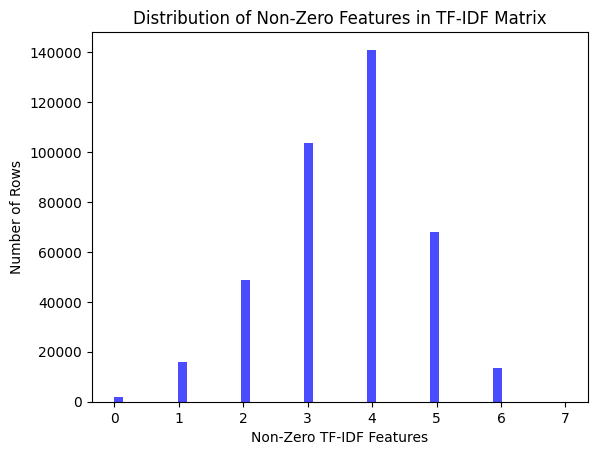

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Description'].fillna(''))

non_zero_counts = tfidf_matrix.getnnz(axis=1)

import pandas as pd
print("Non-zero counts per row (summary):")
print(pd.Series(non_zero_counts).describe())

import matplotlib.pyplot as plt
plt.hist(non_zero_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel("Non-Zero TF-IDF Features")
plt.ylabel("Number of Rows")
plt.title("Distribution of Non-Zero Features in TF-IDF Matrix")
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CountryEncoded'] = encoder.fit_transform(data['Country'])

In [23]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

tfidf_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

data = pd.concat([data, tfidf_df], axis=1)


In [24]:
tfidf_columns = tfidf_feature_names  

rows_with_tfidf_values = data[data[tfidf_columns].sum(axis=1) > 0]

print("Rows with non-zero TF-IDF values:")
print(rows_with_tfidf_values.head())


Rows with non-zero TF-IDF values:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Year  ...  wood  wooden  woodland  word  world  wrap  wreath  writing  \


In [25]:
print("Non-zero entries in TF-IDF matrix:", tfidf_matrix.nnz)

Non-zero entries in TF-IDF matrix: 1409599


In [26]:
non_zero_indices = tfidf_matrix.nonzero()
print("Non-zero positions (row, column):", list(zip(non_zero_indices[0][:10], non_zero_indices[1][:10])))  

Non-zero positions (row, column): [(0, 486), (0, 219), (0, 223), (0, 270), (0, 226), (1, 486), (1, 292), (1, 262), (2, 128), (2, 224)]


In [27]:
non_zero_positions = list(zip(non_zero_indices[0], non_zero_indices[1]))[:10]  

print("Non-zero entries and their corresponding data:")
for row_idx, col_idx in non_zero_positions:
    description = data.loc[row_idx, 'Description']  
    feature_name = tfidf_feature_names[col_idx]     
    tfidf_value = tfidf_matrix[row_idx, col_idx]    
    print(f"Row {row_idx} | Description: {description} | Feature: {feature_name} | TF-IDF Value: {tfidf_value}")


Non-zero entries and their corresponding data:
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: white | TF-IDF Value: 0.4448267494821321
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: hanging | TF-IDF Value: 0.469573063447078
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: heart | TF-IDF Value: 0.38192072769864216
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: light | TF-IDF Value: 0.4621773846811181
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: holder | TF-IDF Value: 0.47133737797202996
Row 1 | Description: WHITE METAL LANTERN | Feature: white | TF-IDF Value: 0.4829952932053673
Row 1 | Description: WHITE METAL LANTERN | Feature: metal | TF-IDF Value: 0.48513040343991276
Row 1 | Description: WHITE METAL LANTERN | Feature: lantern | TF-IDF Value: 0.7289472123547006
Row 2 | Description: CREAM CUPID HEARTS COAT HANGER | Feature: cream | TF-IDF Value: 0.4242525266665898
Row 2 | Description: CR

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

In [29]:
def evaluate_features(feature_indices, X, y):
    X_selected = X[:, feature_indices]
    
    X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.3, random_state=42)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

In [30]:
def firefly_algorithm(X, y, num_fireflies=10, max_generations=20, alpha=0.2, beta=1.0, gamma=1.0):
    num_features = X.shape[1]
    
    fireflies = [np.random.choice([0.0, 1.0], size=num_features) for _ in range(num_fireflies)]
    brightness = np.zeros(num_fireflies)
    
    for gen in range(max_generations):
        for i, firefly in enumerate(fireflies):
            selected_features = np.where(firefly > 0.5)[0] 
            brightness[i] = evaluate_features(selected_features, X, y)
        
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if brightness[j] > brightness[i]:  
                    attraction = beta * np.exp(-gamma * np.linalg.norm(fireflies[i] - fireflies[j])**2)
                    random_move = alpha * (np.random.random(size=num_features) - 0.5)
                    fireflies[i] += attraction * (fireflies[j] - fireflies[i]) + random_move
        
        fireflies = [np.where(firefly > 0.5, 1.0, 0.0) for firefly in fireflies]
        
        best_brightness = max(brightness)
        print(f"Generation {gen+1}/{max_generations} - Best Brightness: {best_brightness}")
    
    best_firefly = fireflies[np.argmax(brightness)]
    selected_features = np.where(best_firefly > 0.5)[0]
    
    return selected_features


In [31]:
X = tfidf_matrix.toarray()
y = data['CountryEncoded'].values

selected_features_indices = firefly_algorithm(X, y, num_fireflies=10, max_generations=20, alpha=0.2, beta=1.0, gamma=1.0)

selected_feature_names = tfidf_vectorizer.get_feature_names_out()[selected_features_indices]
print("Selected Features:")
print(selected_feature_names)


Generation 1/20 - Best Brightness: 0.8886747928833356
Generation 2/20 - Best Brightness: 0.8886747928833356
Generation 3/20 - Best Brightness: 0.8886747928833356
Generation 4/20 - Best Brightness: 0.8886747928833356
Generation 5/20 - Best Brightness: 0.8886747928833356
Generation 6/20 - Best Brightness: 0.8886747928833356
Generation 7/20 - Best Brightness: 0.8886747928833356
Generation 8/20 - Best Brightness: 0.8886747928833356
Generation 9/20 - Best Brightness: 0.8886747928833356
Generation 10/20 - Best Brightness: 0.8886747928833356
Generation 11/20 - Best Brightness: 0.8886747928833356
Generation 12/20 - Best Brightness: 0.8886747928833356
Generation 13/20 - Best Brightness: 0.8886747928833356
Generation 14/20 - Best Brightness: 0.8886747928833356
Generation 15/20 - Best Brightness: 0.8886747928833356
Generation 16/20 - Best Brightness: 0.8886747928833356
Generation 17/20 - Best Brightness: 0.8886747928833356
Generation 18/20 - Best Brightness: 0.8886747928833356
Generation 19/20 - 

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_selected_features = X[:, selected_features_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features, y, test_size=0.3, random_state=42
)

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8886747928833356

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.00      0.00      0.00       130
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00       602
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        55
           6       0.00      0.00      0.00       218
           7       0.00      0.00      0.00       177
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00       113
          10       0.00      0.00      0.00      2183
          11       0.00      0.00      0.00        19
          12       0.00      0.00      0.00       202
          13       0.00      0.00      0.00      2561
          14       0.34      0.04      0.07      2771
          15       0.00      0.00      0.00        52
          16       0.00

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [42]:
new_description = ["Description 211	SMALL HEART MEASURING SPOONS "]

X_new_input_dense = X_new_input.toarray()

X_new_input_selected_dense = X_new_input_dense[:, selected_features_indices]

y_pred_new_input = svm_classifier.predict(X_new_input_selected_dense)

predicted_country = encoder.inverse_transform(y_pred_new_input)

print(f"Predicted country for the input description: {predicted_country[0]}")

Predicted country for the input description: United Kingdom


In [43]:
print("Class Distribution in the dataset:")
print(data['Country'].value_counts())

Class Distribution in the dataset:
Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                        

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_selected_features = X[:, selected_features_indices]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected_features, y, test_size=0.3, random_state=42
)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))



In [ ]:
new_description = ["Description 211	SMALL HEART MEASURING SPOONS "]

X_new_input = tfidf_vectorizer.transform(new_description)

X_new_input_dense = X_new_input.toarray()

X_new_input_selected_dense = X_new_input_dense[:, selected_features_indices]

y_pred_new_input_nb = nb_classifier.predict(X_new_input_selected_dense)

predicted_country_nb = encoder.inverse_transform(y_pred_new_input_nb)

print(f"Predicted country for the input description using Naive Bayes: {predicted_country_nb[0]}")
